In [63]:
# read and preprocess data


import csv
import numpy as np
import random


rData = []
with open('Admission_Predict_Ver1.1.csv', 'r') as f:
    reader = csv.reader(f)
    for line in reader:
        rData.append(line)

print(rData[0], '\n')

data = []

for rLine in rData[1:]:
    line = []
    for number in rLine[1:]:
        line.append(float(number))
    data.append(line)

for i in range(len(data)):
    data[i][0] = (data[i][0] - 290) / 50
    data[i][1] = (data[i][1] - 92) / 28
    data[i][2] = (data[i][2] - 1) / 4
    data[i][3] = (data[i][3] - 1) / 4
    data[i][4] = (data[i][4] - 1) / 4
    data[i][5] = (data[i][5] - 6.8) / 3.12
    
random.shuffle(data)

print(*data[495:], '\n', sep = '\n')

X = [line[:7] for line in data]
y = [line[7] for line in data]

trainX = X[:400]
trainy = y[:400]
testX = X[400:]
testy = y[400:]

print(*trainX[395:], sep = '\n')
print(*trainy[395:], sep = '\n')

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit'] 

[0.6, 0.6785714285714286, 0.75, 0.875, 0.625, 0.6634615384615382, 1.0, 0.85]
[0.3, 0.5714285714285714, 1.0, 0.5, 0.5, 0.5384615384615387, 0.0, 0.61]
[0.86, 0.75, 1.0, 0.75, 0.75, 0.7948717948717947, 1.0, 0.89]
[0.38, 0.5714285714285714, 0.5, 0.375, 0.5, 0.42307692307692285, 0.0, 0.72]
[0.4, 0.42857142857142855, 0.5, 0.25, 0.625, 0.503205128205128, 0.0, 0.7]


[0.16, 0.4642857142857143, 0.5, 0.625, 0.75, 0.5576923076923075, 0.0]
[0.56, 0.6071428571428571, 0.0, 0.625, 0.625, 0.7435897435897434, 0.0]
[0.22, 0.17857142857142858, 0.25, 0.5, 0.5, 0.34615384615384615, 1.0]
[0.3, 0.42857142857142855, 0.25, 0.375, 0.125, 0.31730769230769235, 0.0]
[0.2, 0.42857142857142855, 0.5, 0.625, 0.5, 0.43589743589743596, 0.0]
0.69
0.78
0.44
0.53
0.71


In [64]:
# K Nearest Neighbors


k = 10
KNNScores = []

for k in range(1, 30):

    def getDist(studentA, studentB):
        dist2 = 0
        for i in range(7):
            dist2 += (studentA[i] - studentB[i]) ** 2
        return dist2 ** 0.5

    print(getDist(trainX[395], trainX[396]), '\n')

    predicty = []

    for test in testX:

        trainXCopy = []
        for train in trainX:
            trainXCopy.append(train.copy())
        trainyCopy = trainy.copy()

        nearestScores = []

        for i in range(k):
            nearestStudent = min(trainXCopy, key = lambda train : getDist(train, test))
            index = trainXCopy.index(nearestStudent)
            nearestScores.append(trainyCopy[index])
            del trainXCopy[index]
            del trainyCopy[index]

        predicty.append(sum(nearestScores) / k)

    print(predicty[95:], '\n', testy[95:], '\n')

    KNNScore = np.corrcoef(predicty, testy)[0][1]
#     print(KNNScore)
    
    KNNScores.append(KNNScore)

0.6932467237128117 

[0.74, 0.71, 0.93, 0.58, 0.64] 
 [0.85, 0.61, 0.89, 0.72, 0.7] 

0.6932467237128117 

[0.77, 0.6399999999999999, 0.925, 0.675, 0.64] 
 [0.85, 0.61, 0.89, 0.72, 0.7] 

0.6932467237128117 

[0.7766666666666667, 0.6333333333333333, 0.9166666666666666, 0.6833333333333332, 0.66] 
 [0.85, 0.61, 0.89, 0.72, 0.7] 

0.6932467237128117 

[0.7875, 0.6375, 0.915, 0.695, 0.6275] 
 [0.85, 0.61, 0.89, 0.72, 0.7] 

0.6932467237128117 

[0.8039999999999999, 0.6239999999999999, 0.9179999999999999, 0.6839999999999999, 0.6519999999999999] 
 [0.85, 0.61, 0.89, 0.72, 0.7] 

0.6932467237128117 

[0.8133333333333334, 0.6166666666666666, 0.9116666666666666, 0.695, 0.6616666666666666] 
 [0.85, 0.61, 0.89, 0.72, 0.7] 

0.6932467237128117 

[0.8171428571428571, 0.6385714285714286, 0.9128571428571428, 0.6914285714285714, 0.65] 
 [0.85, 0.61, 0.89, 0.72, 0.7] 

0.6932467237128117 

[0.80125, 0.6475, 0.91125, 0.68125, 0.6599999999999999] 
 [0.85, 0.61, 0.89, 0.72, 0.7] 

0.6932467237128117 

[0.

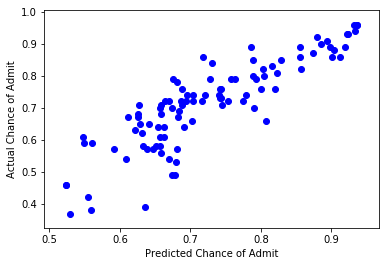

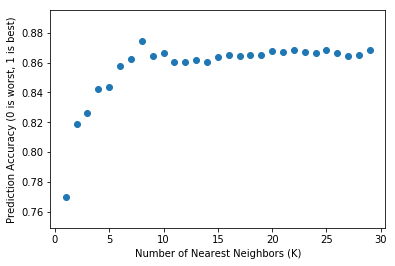

In [65]:
import matplotlib.pyplot as plt

plt.scatter(predicty, testy, color = 'blue')
plt.xlabel('Predicted Chance of Admit')
plt.ylabel('Actual Chance of Admit')
plt.show()

plt.scatter(list(range(1, 30)), KNNScores)
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Prediction Accuracy (0 is worst, 1 is best)')
plt.show()

In [47]:
# Artificial Neural Network


import math


def sigmoid(z):
    a = 1 / (1 + math.e ** (- z))
    return a

def dSigmoid(a):
    return a * (1 - a)

sigmoid = np.vectorize(sigmoid)
dSigmoid = np.vectorize(dSigmoid)

layers = [7, 10, 10, 10, 1]

ita = 0.05

# Initialize weights

Weights = []

for k in range(len(layers) - 1):
    Weight = np.random.rand(layers[k + 1], layers[k] + 1)
    Weight = Weight * 2 - 1
    Weights.append(Weight)

print('weights: ', *[Weight.shape for Weight in Weights])

# Propagation

results = []

for train in [trainX[395]]:
    
    activation = np.matrix(train).T
    activations = []
    
    for Weight in Weights:
        activation = np.vstack([activation, np.matrix(1)])
        activations.append(activation)
        activation = Weight * activation
        activation = sigmoid(activation)
    
    activations.append(activation)
    
#     print('activations: ', *[activation.shape for activation in activations])
    
    result = activation[0, 0]
    
    for x in range(1000):
        
        error = trainy[395] - result
        errors = [np.matrix(error)]


        for k in range(len(layers) - 1):

            rawError = Weights[len(layers) - k - 2].T * error
            rawDSigmoid = dSigmoid(activations[len(layers) - k - 2])
            error = np.multiply(rawError, rawDSigmoid)
            error = error[:-1]
            errors.insert(0, np.vstack([error, np.matrix(0)]))

#         print('errors: ', *[error.shape for error in errors])

        slopes = []

        for k in range(len(layers) - 2):
            slope = errors[k + 1][:-1] * activations[k].T
            slopes.append(slope)

        slope = errors[-1] * activations[-2].T
        slopes.append(slope)

#         print('slopes: ', *[slope.shape for slope in slopes])

        for i in range(len(Weights)):
            Weights[i] -= ita * slopes[i]
    
    
    activation = np.matrix(train).T
    activations = []
    
    for Weight in Weights:
        activation = np.vstack([activation, np.matrix(1)])
        activations.append(activation)
        activation = Weight * activation
        activation = sigmoid(activation)
    
    activations.append(activation)
    
#     print('activations: ', *[activation.shape for activation in activations])
    
    result = activation[0, 0]
    
print(trainX[395], trainy[395], result)



weights:  (10, 8) (10, 11) (10, 11) (1, 11)
[0.4, 0.5, 0.25, 0.625, 0.375, 0.4903846153846155, 0.0] 0.73 2.17969519999e-10


In [ ]:
Weights[2]
error